In [5]:
import os
from numpy import *
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import wget

Data fromt http://mixedlayer.ucsd.edu/

In [65]:
url = 'http://mixedlayer.ucsd.edu/data/Argo_mixedlayers_monthlyclim_05092018.nc'
url_mls = 'http://mixedlayer.ucsd.edu/data/Argo_mixedlayers_all_05092018.nc'

In [3]:
data_dir = "/Users/dhruvbalwada/work_root/sogos/data/raw/climatology/"

In [6]:
# download the big climatology files
wget.download(
    url,
    data_dir,
)

'/Users/dhruvbalwada/work_root/sogos/data/raw/climatology//Argo_mixedlayers_monthlyclim_05092018.nc'

In [66]:
# download the big climatology files
wget.download(
    url_mls,
    data_dir,
)

'/Users/dhruvbalwada/work_root/sogos/data/raw/climatology//Argo_mixedlayers_all_05092018.nc'

## Start Analyzing the data 

In [70]:
ds_ind = xr.open_dataset(data_dir + 'Argo_mixedlayers_all_05092018.nc')
ds_ind

<xarray.Dataset>
Dimensions:        (iNPROF: 1512603)
Dimensions without coordinates: iNPROF
Data variables:
    da_mld         (iNPROF) float64 ...
    da_mlpd        (iNPROF) float64 ...
    da_mls         (iNPROF) float64 ...
    da_mlt         (iNPROF) float64 ...
    dt_mld         (iNPROF) float64 ...
    dt_mlpd        (iNPROF) float64 ...
    dt_mls         (iNPROF) float64 ...
    dt_mlt         (iNPROF) float64 ...
    floatnumber    (iNPROF) float64 ...
    profiledate    (iNPROF) float64 ...
    profilelat     (iNPROF) float64 ...
    profilelon     (iNPROF) float64 ...
    profilenumber  (iNPROF) float64 ...
    status         (iNPROF) float64 ...
    ta_mld         (iNPROF) float64 ...
    tt_mld         (iNPROF) float64 ...
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         13-May-2018

In [90]:
ds_ind.profiledate[0]

<xarray.DataArray 'profiledate' ()>
array(730848.53015)
Attributes:
    long_name:        Profile date
    standard_name:    profiledate
    units:            Date referenced to Jan-1-0000.  1 corresponds to Jan-1-...
    _CoordinateAxis:  NPROF
    valid_min:        730486.0
    valid_max:        737190.0
    title:            Profile date

In [83]:
temp = ds_ind.where(ds_ind.profilelat<-5
            ).where(ds_ind.profilelat>-55
                   ).where(ds_ind.profilelon>20
                          ).where(ds_ind.profilelon<40)

In [94]:
# load data 
ds = xr.open_dataset(data_dir + 'Argo_mixedlayers_monthlyclim_05092018.nc')
ds

<xarray.Dataset>
Dimensions:        (iLAT: 180, iLON: 360, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables:
    lat            (iLAT) float64 ...
    lon            (iLON) float64 ...
    month          (iMONTH) float64 ...
    mld_da_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_da_median  (iLAT, iLON, iMONTH) float64 ...
    mld_dt_median  (iLAT, iLON, iMONTH) float64 ...
    mld_da_std     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_std     (iLAT, iLON, iMONTH) float64 ...
    mld_da_max     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_max     (iLAT, iLON, iMONTH) float64 ...
    mlpd_da        (iLAT, iLON, iMONTH) float64 ...
    mlpd_dt        (iLAT, iLON, iMONTH) float64 ...
    mlt_da         (iLAT, iLON, iMONTH) float64 ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 ...
    mls_da         (iLAT, iLON, iMONTH) float64 ...
    mls_dt         (iLAT, iLON, iMONTH) float64 ...
    num           

In [104]:
ds.coords['iLAT'] = ds.lat
ds.coords['iLON'] = ds.lon
ds.coords['iMONTH'] = ds.month

In [105]:
ds

<xarray.Dataset>
Dimensions:        (iLAT: 180, iLON: 360, iMONTH: 12)
Coordinates:
    lat            (iLAT) float64 ...
    lon            (iLON) float64 ...
    month          (iMONTH) float64 ...
  * iLAT           (iLAT) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * iLON           (iLON) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * iMONTH         (iMONTH) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
Data variables:
    mld_da_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_da_median  (iLAT, iLON, iMONTH) float64 ...
    mld_dt_median  (iLAT, iLON, iMONTH) float64 ...
    mld_da_std     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_std     (iLAT, iLON, iMONTH) float64 ...
    mld_da_max     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_max     (iLAT, iLON, iMONTH) float64 ...
    mlpd_da        (iLAT, iLON, iMONTH) float64 ...
    mlpd_dt        (iLAT, iLON, iMONTH) float64 ...
    mlt_da         (iLAT, iLON,

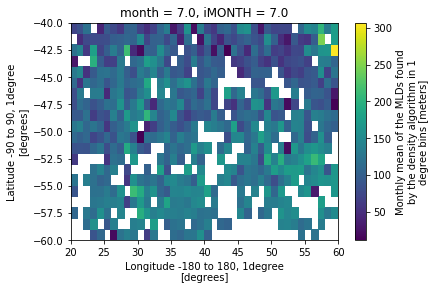

In [108]:
ds.mld_da_mean.sel(iLAT=slice(-60,-40), iLON=slice(20,60)).isel(iMONTH=6).plot()

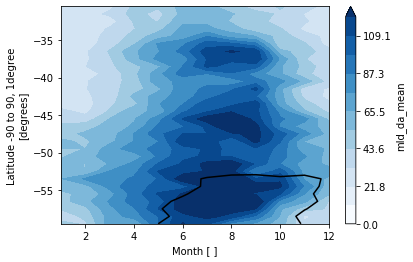

In [147]:
ds.mld_da_mean.sel(iLAT=slice(-60,-30), iLON=slice(25,45)).mean('iLON').plot.contourf(vmax=120, vmin=0, levels=12, cmap='Blues')
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contour(levels=[27.189, 27.752], colors='k')

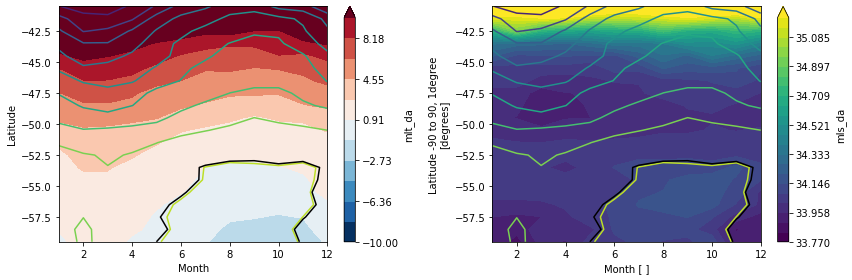

In [149]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ds.mlt_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contourf(vmin=-10, levels=12)
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contour(levels=12)
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contour(levels=[27.189, 27.752], colors='k')
plt.xlabel('Month')
plt.ylabel('Latitude')

plt.subplot(122)
ds.mls_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contourf(vmin=33.77, vmax=35.21,levels=24)
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contour(levels=12)
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(25,45)).mean('iLON').plot.contour(levels=[27.189, 27.752], colors='k')

plt.tight_layout()

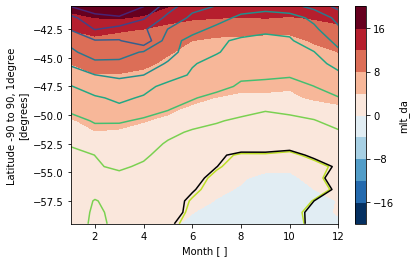

In [142]:
ds.mlt_da.sel(iLAT=slice(-60,-40), iLON=slice(30,50)).mean('iLON').plot.contourf(levels=12)
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(30,50)).mean('iLON').plot.contour(levels=12)
ds.mlpd_da.sel(iLAT=slice(-60,-40), iLON=slice(30,50)).mean('iLON').plot.contour(levels=[27.189, 27.752], colors='k')

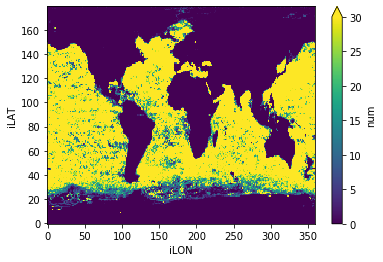

In [43]:
ds.num.sum('iMONTH').plot(vmax=30)

(-75, -25)

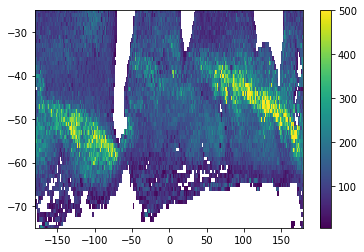

In [38]:
plt.pcolormesh(ds.lon, ds.lat, ds.mld_da_max.max('iMONTH'), vmax=500)
plt.colorbar()
plt.ylim([-75, -25])

In [60]:
def plot_a_box(xp, yp, col):
    box_x = [xp[0], xp[1], xp[1], xp[0], xp[0]]
    box_y = [yp[0], yp[0], yp[1], yp[1], yp[0]]
    plt.plot(box_x, box_y, color=col)

In [58]:
ar_xp = [30, 40]
ar_yp = [-55, -50]

In [93]:
ds.mld_da_mean

<xarray.DataArray 'mld_da_mean' (iLAT: 180, iLON: 360, iMONTH: 12)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Dimensions without coordinates: iLAT, iLON, iMONTH
Attributes:
    long_name:        Monthly mean of the MLDs found by the density algorithm...
    standard_name:    mld_da_mean
    units:            meters
    _CoordinateAxis:  month lat lon
    valid_min:        95.0
    valid_max:        110.0
 

In [ ]:
plt.plot(ds.mld_da_mean.ise)

(20, 90)

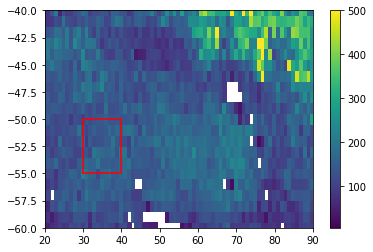

In [61]:
plt.pcolormesh(ds.lon, ds.lat, ds.mld_da_mean.max('iMONTH'), vmax=500)

plot_a_box(ar_xp ,ar_yp, 'r')

plt.colorbar()
plt.ylim([-60, -40])
plt.xlim([20, 90])

(20, 90)

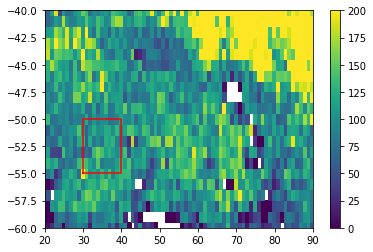

In [64]:
plt.pcolormesh(ds.lon, ds.lat, ds.mld_da_mean.max('iMONTH') - ds.mld_da_mean.min('iMONTH') , vmax=200)

plot_a_box(ar_xp ,ar_yp, 'r')

plt.colorbar()
plt.ylim([-60, -40])
plt.xlim([20, 90])

In [23]:
ds.lat

<xarray.DataArray 'lat' (iLAT: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.

ValueError: dimensions or multi-index levels ['lat'] do not exist

In [13]:
ds.mlpd_dt

<xarray.DataArray 'mlpd_dt' (iLAT: 180, iLON: 360, iMONTH: 12)>
[777600 values with dtype=float64]
Dimensions without coordinates: iLAT, iLON, iMONTH
Attributes:
    long_name:        Monthly averages of the ML potential densities found by...
    standard_name:    mlpd_dt
    units:            kg/m^3
    _CoordinateAxis:  month lat lon
    valid_min:        95.0
    valid_max:        116.0
    title:            Monthly averages of the ML potential densities found by...
    institution:      SIO

In [9]:
ds.mld_da_mean

<xarray.DataArray 'mld_da_mean' (iLAT: 180, iLON: 360, iMONTH: 12)>
[777600 values with dtype=float64]
Dimensions without coordinates: iLAT, iLON, iMONTH
Attributes:
    long_name:        Monthly mean of the MLDs found by the density algorithm...
    standard_name:    mld_da_mean
    units:            meters
    _CoordinateAxis:  month lat lon
    valid_min:        95.0
    valid_max:        110.0
    title:            Monthly mean of the MLDs found by the density algorithm...
    institution:      SIO

In [12]:
ds.mld_dt_mean

<xarray.DataArray 'mld_dt_mean' (iLAT: 180, iLON: 360, iMONTH: 12)>
[777600 values with dtype=float64]
Dimensions without coordinates: iLAT, iLON, iMONTH
Attributes:
    long_name:        Monthly mean of the MLDs found by the density threshold...
    standard_name:    mld_dt_mean
    units:            meters
    _CoordinateAxis:  month lat lon
    valid_min:        95.0
    valid_max:        116.0
    title:            Monthly mean of the MLDs found by the density threshold...
    institution:      SIO